<a href="https://colab.research.google.com/github/Soumyadeep-Basak/Hospital-LOS-predictor/blob/main/Predicted_length_of_stay_in__hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv')

<ipython-input-6-468eed5a5f1a>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv')


In [7]:
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,NaN,NaN,267162.0,NaN,NaN,0,N,Y,$5620.00,$4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,...,NaN,NaN,275408.0,NaN,NaN,0,N,Y,$7404.18,$6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,...,NaN,NaN,267162.0,NaN,NaN,0,N,Y,$7931.28,$7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,NaN,NaN,271326.0,NaN,NaN,0,N,Y,$11304.44,$4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,...,NaN,NaN,243034.0,NaN,NaN,0,N,Y,$8330.50,$4361.74


In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)
print(len(numerical_cols))



['Operating Certificate Number', 'Facility Id', 'Discharge Year', 'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code', 'Attending Provider License Number', 'Operating Provider License Number', 'Other Provider License Number', 'Birth Weight']
12


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
print(len(categorical_cols))



['Health Service Area', 'Hospital County', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3', 'Abortion Edit Indicator', 'Emergency Department Indicator', 'Total Charges', 'Total Costs']
25


In [10]:
print(df.columns)


Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')


In [11]:


print(len(df.columns))


37


In [12]:

df = df.drop(['CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description',  'APR Severity of Illness Description'], axis=1)


In [13]:
df = df.drop(['Payment Typology 2', 'Payment Typology 3', 'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',  'Birth Weight', 'Abortion Edit Indicator'], axis=1)


In [14]:
print(df.columns)

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Procedure Code',
       'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Emergency Department Indicator', 'Total Charges',
       'Total Costs'],
      dtype='object')


In [15]:
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,0,753,19,1,Minor,Medical,Medicaid,Y,$5620.00,$4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,...,0,753,19,2,Minor,Medical,Medicaid,Y,$7404.18,$6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,...,0,753,19,1,Minor,Medical,Medicaid,Y,$7931.28,$7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,0,141,4,1,Minor,Medical,Medicare,Y,$11304.44,$4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,...,0,53,1,2,Moderate,Medical,Medicaid,Y,$8330.50,$4361.74


In [16]:
df.isnull().sum()

,0
Health Service Area,2911
Hospital County,2911
Operating Certificate Number,2911
Facility Id,2911
Facility Name,0
Age Group,0
Zip Code - 3 digits,4427
Gender,0
Race,0
Ethnicity,0


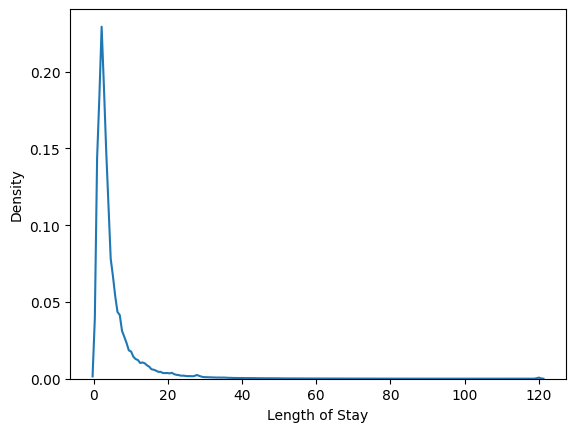

In [17]:

df['Length of Stay'] = df['Length of Stay'].astype(str).str.extract('(\d+)').astype(float)
sns.kdeplot(df['Length of Stay'])
plt.show()


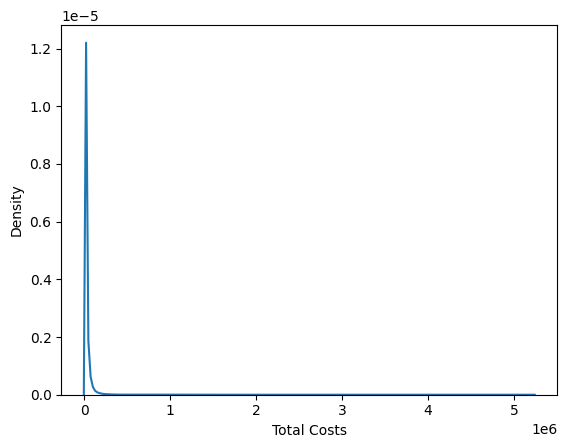

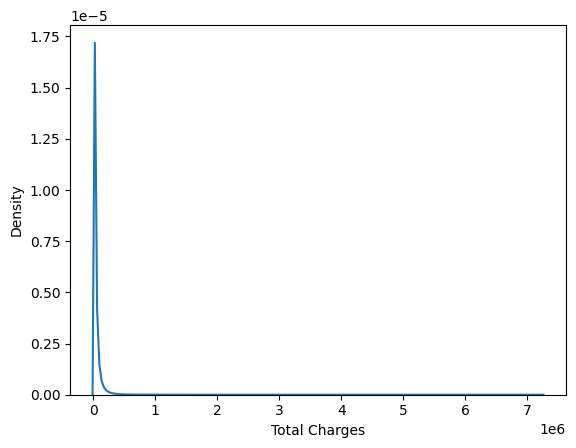

In [18]:

df['Total Costs'] = df['Total Costs'].astype(str).str.replace('$', '').astype(float)
sns.kdeplot(df['Total Costs'])
plt.show()

df['Total Charges'] = df['Total Charges'].astype(str).str.replace('$', '').astype(float)
sns.kdeplot(df['Total Charges'])
plt.show()


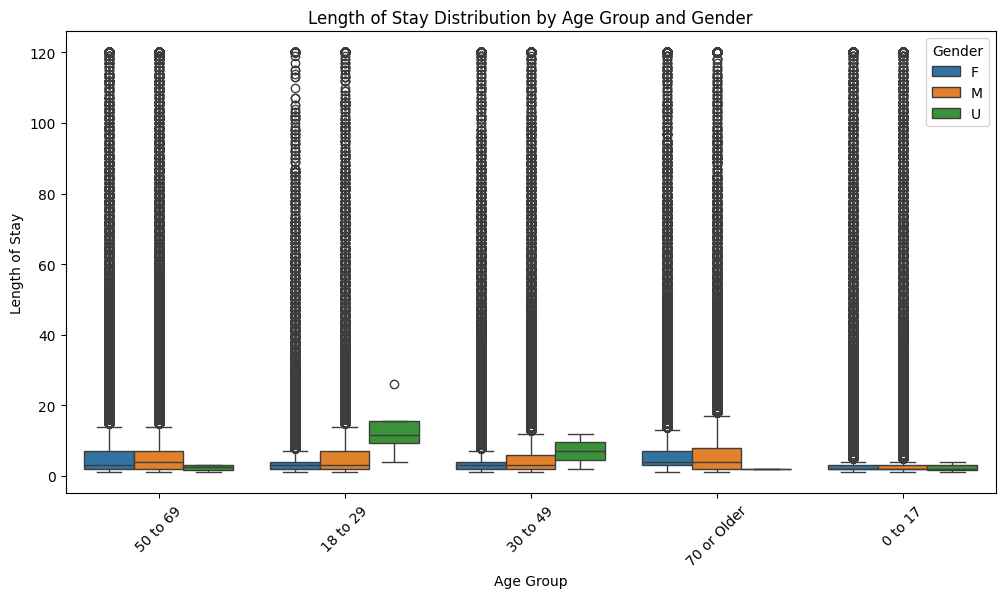

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_

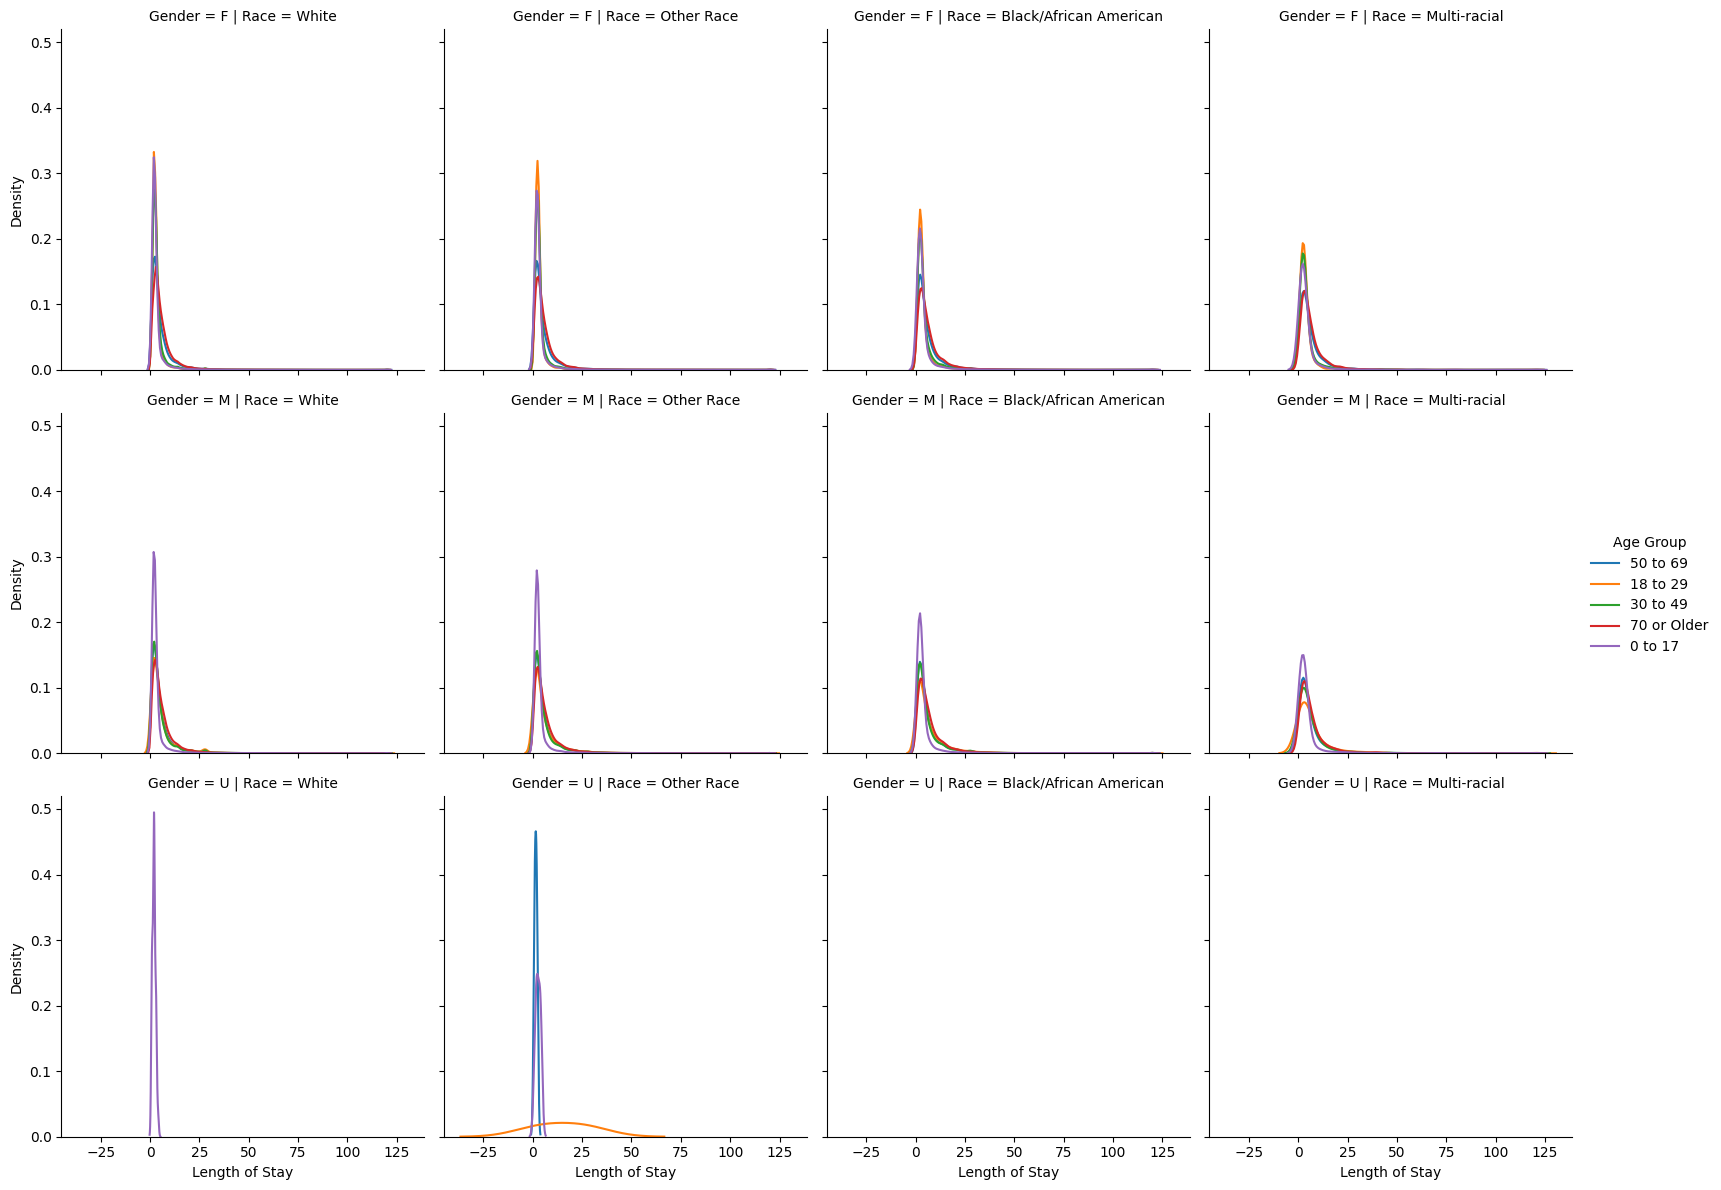

In [19]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Length of Stay', hue='Gender', data=df)
plt.xticks(rotation=45)
plt.title('Length of Stay Distribution by Age Group and Gender')
plt.show()

g = sns.FacetGrid(df, col="Race", row="Gender", hue="Age Group", height=4)
g.map(sns.kdeplot, "Length of Stay")
g.add_legend()
plt.show()


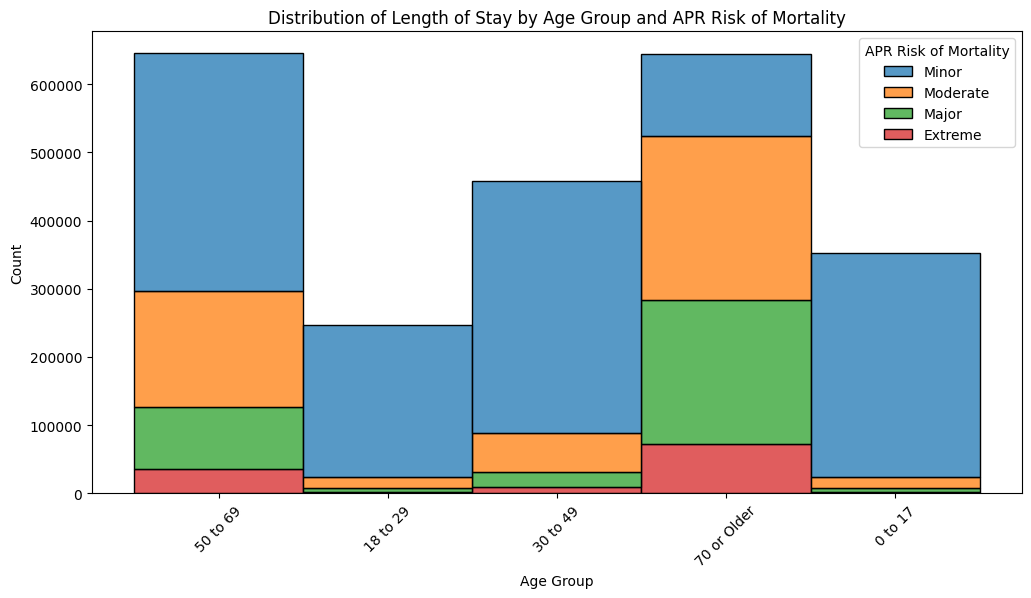

In [20]:

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age Group', hue='APR Risk of Mortality', multiple='stack')
plt.xticks(rotation=45)
plt.title('Distribution of Length of Stay by Age Group and APR Risk of Mortality')
plt.show()


In [23]:
categorical_cols.remove('CCS Diagnosis Description')
categorical_cols.remove('CCS Procedure Description')
categorical_cols.remove('APR DRG Description')
categorical_cols.remove('APR MDC Description')
categorical_cols.remove('APR Severity of Illness Description')
categorical_cols.remove('Payment Typology 2')
categorical_cols.remove('Payment Typology 3')

categorical_cols

['Health Service Area',
 'Hospital County',
 'Facility Name',
 'Age Group',
 'Zip Code - 3 digits',
 'Gender',
 'Race',
 'Ethnicity',
 'Length of Stay',
 'Type of Admission',
 'Patient Disposition',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Payment Typology 1',
 'Abortion Edit Indicator',
 'Emergency Department Indicator',
 'Total Charges',
 'Total Costs']

In [25]:

from sklearn.preprocessing import LabelEncoder

df['Length of Stay'].fillna(df['Length of Stay'].median(), inplace=True)

label_encoder = LabelEncoder()
for col in categorical_cols:
  if col in df.columns:  # Check if column exists in DataFrame
    df[col] = label_encoder.fit_transform(df[col])
  else:
    print(f"Warning: Column '{col}' not found in DataFrame. Skipping encoding.")


In [26]:
df.isnull().sum()

,0
Health Service Area,0
Hospital County,0
Operating Certificate Number,2911
Facility Id,2911
Facility Name,0
Age Group,0
Zip Code - 3 digits,0
Gender,0
Race,0
Ethnicity,0


In [27]:


df['Operating Certificate Number'].fillna(df['Operating Certificate Number'].median(), inplace=True)


In [28]:

df['Facility Id'].fillna(df['Facility Id'].median(), inplace=True)


In [29]:

df['Payment Typology 1'].fillna(df['Payment Typology 1'].median(), inplace=True)


In [30]:
df.isnull().sum()

,0
Health Service Area,0
Hospital County,0
Operating Certificate Number,0
Facility Id,0
Facility Name,0
Age Group,0
Zip Code - 3 digits,0
Gender,0
Race,0
Ethnicity,0


In [31]:

df['APR Severity of Illness Code'].fillna(df['APR Severity of Illness Code'].median(), inplace=True)


In [32]:
# APR Risk of Mortality	2
# APR Medical Surgical Description	1
# Payment Typology 1	1
# Emergency Department Indicator	1
# Total Charges	1
# Total Costs drop missing value

df.dropna(subset=['APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Emergency Department Indicator', 'Total Charges', 'Total Costs'], inplace=True)


In [33]:
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,7,4,401001.0,66.0,133,3,46,0,3,1,...,0,753,19,1,2,0,4,1,90660,265431
1,7,4,401001.0,66.0,133,1,46,0,3,1,...,0,753,19,2,2,0,4,1,158359,450402
2,7,4,401001.0,66.0,133,2,46,1,3,1,...,0,753,19,1,2,0,4,1,181005,466938
3,7,4,401001.0,66.0,133,3,46,0,3,1,...,0,141,4,1,2,0,5,1,320417,267282
4,7,6,602001.0,103.0,209,3,46,1,3,1,...,0,53,1,2,3,0,4,1,197988,249754


In [34]:
df.shape

(2346760, 25)

In [35]:
Q1 = df['Health Service Area'].quantile(0.25)
Q3 = df['Health Service Area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Health Service Area'] < lower_bound) | (df['Health Service Area'] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [Health Service Area, Hospital County, Operating Certificate Number, Facility Id, Facility Name, Age Group, Zip Code - 3 digits, Gender, Race, Ethnicity, Length of Stay, Type of Admission, Patient Disposition, Discharge Year, CCS Diagnosis Code, CCS Procedure Code, APR DRG Code, APR MDC Code, APR Severity of Illness Code, APR Risk of Mortality, APR Medical Surgical Description, Payment Typology 1, Emergency Department Indicator, Total Charges, Total Costs]
Index: []

[0 rows x 25 columns]


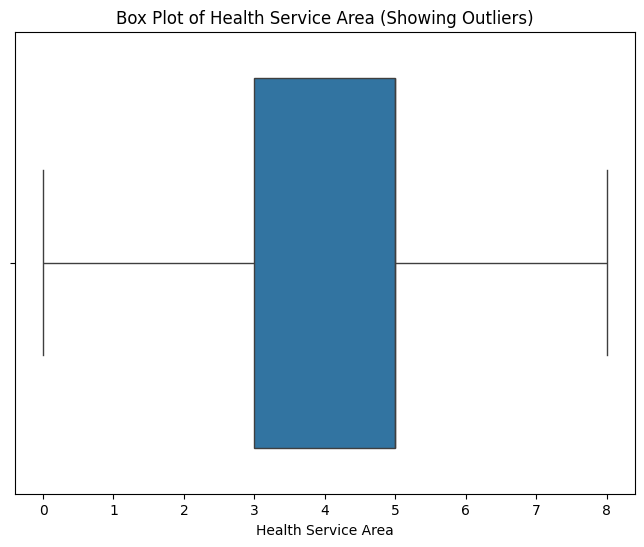

In [36]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Health Service Area'])
plt.title('Box Plot of Health Service Area (Showing Outliers)')
plt.show()


In [37]:

df['Health Service Area'] = np.clip(df['Health Service Area'], lower_bound, upper_bound)

df = df[(df['Health Service Area'] >= lower_bound) & (df['Health Service Area'] <= upper_bound)]


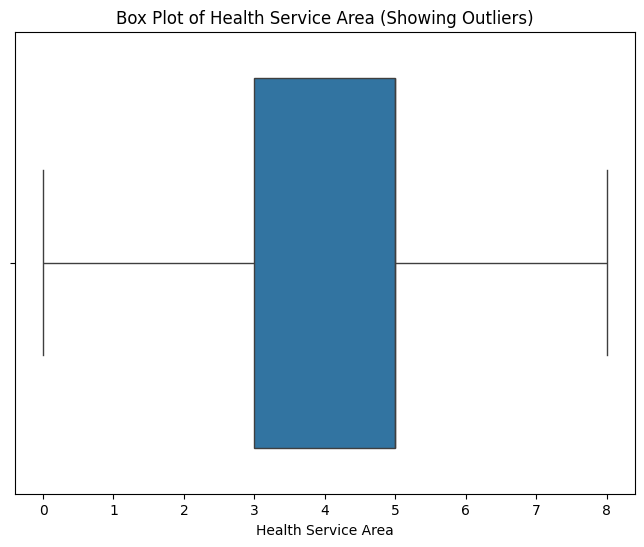

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Health Service Area'])
plt.title('Box Plot of Health Service Area (Showing Outliers)')
plt.show()


Empty DataFrame
Columns: [Health Service Area, Hospital County, Operating Certificate Number, Facility Id, Facility Name, Age Group, Zip Code - 3 digits, Gender, Race, Ethnicity, Length of Stay, Type of Admission, Patient Disposition, Discharge Year, CCS Diagnosis Code, CCS Procedure Code, APR DRG Code, APR MDC Code, APR Severity of Illness Code, APR Risk of Mortality, APR Medical Surgical Description, Payment Typology 1, Emergency Department Indicator, Total Charges, Total Costs]
Index: []

[0 rows x 25 columns]


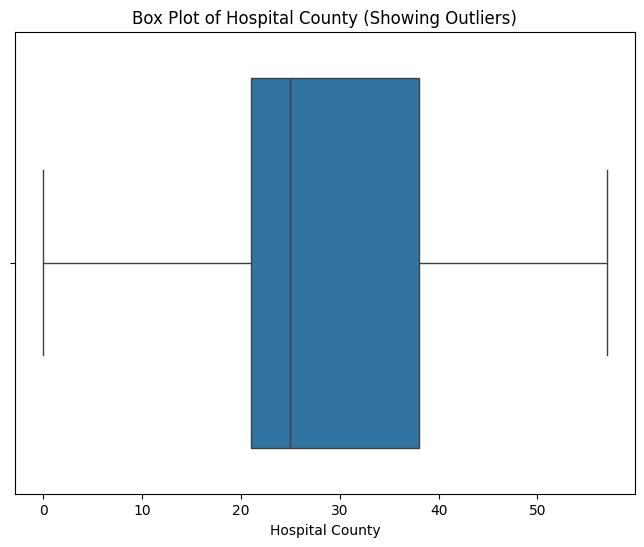

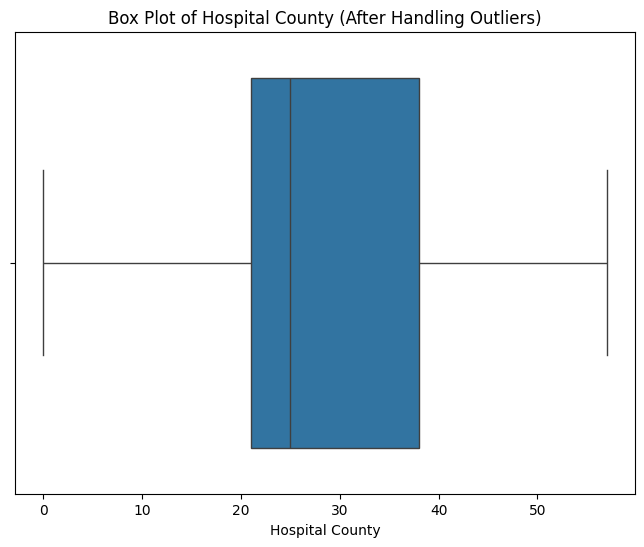

In [39]:

Q1 = df['Hospital County'].quantile(0.25)
Q3 = df['Hospital County'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Hospital County'] < lower_bound) | (df['Hospital County'] > upper_bound)]
print(outliers)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Hospital County'])
plt.title('Box Plot of Hospital County (Showing Outliers)')
plt.show()

df['Hospital County'] = np.clip(df['Hospital County'], lower_bound, upper_bound)


# df = df[(df['Hospital County'] >= lower_bound) & (df['Hospital County'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Hospital County'])
plt.title('Box Plot of Hospital County (After Handling Outliers)')
plt.show()


In [40]:
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,7,4,401001.0,66.0,133,3,46,0,3,1,...,0,753,19,1,2,0,4,1,90660,265431
1,7,4,401001.0,66.0,133,1,46,0,3,1,...,0,753,19,2,2,0,4,1,158359,450402
2,7,4,401001.0,66.0,133,2,46,1,3,1,...,0,753,19,1,2,0,4,1,181005,466938
3,7,4,401001.0,66.0,133,3,46,0,3,1,...,0,141,4,1,2,0,5,1,320417,267282
4,7,6,602001.0,103.0,209,3,46,1,3,1,...,0,53,1,2,3,0,4,1,197988,249754


Empty DataFrame
Columns: [Health Service Area, Hospital County, Operating Certificate Number, Facility Id, Facility Name, Age Group, Zip Code - 3 digits, Gender, Race, Ethnicity, Length of Stay, Type of Admission, Patient Disposition, Discharge Year, CCS Diagnosis Code, CCS Procedure Code, APR DRG Code, APR MDC Code, APR Severity of Illness Code, APR Risk of Mortality, APR Medical Surgical Description, Payment Typology 1, Emergency Department Indicator, Total Charges, Total Costs]
Index: []

[0 rows x 25 columns]


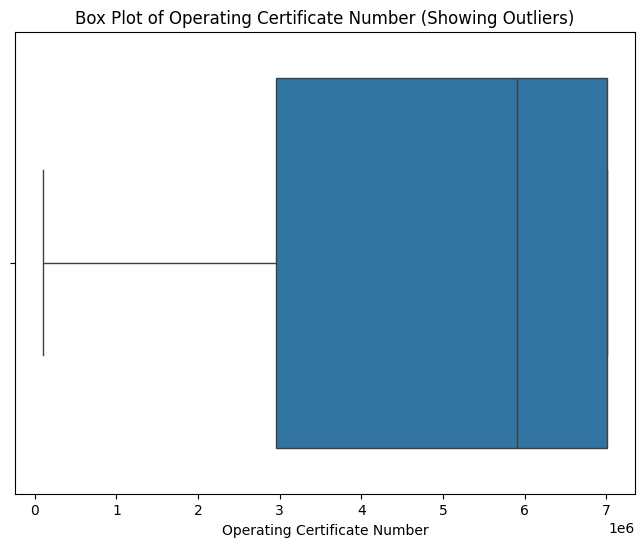

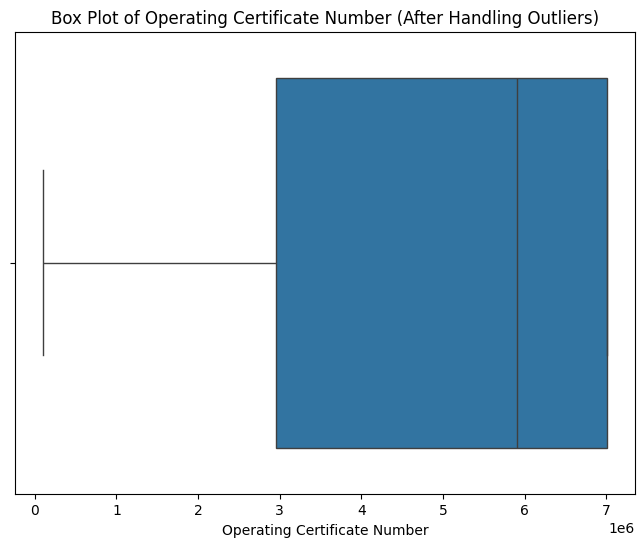

In [41]:

Q1 = df['Operating Certificate Number'].quantile(0.25)
Q3 = df['Operating Certificate Number'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Operating Certificate Number'] < lower_bound) | (df['Operating Certificate Number'] > upper_bound)]
print(outliers)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Operating Certificate Number'])
plt.title('Box Plot of Operating Certificate Number (Showing Outliers)')
plt.show()

df['Operating Certificate Number'] = np.clip(df['Operating Certificate Number'], lower_bound, upper_bound)


# df = df[(df['Operating Certificate Number'] >= lower_bound) & (df['Operating Certificate Number'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Operating Certificate Number'])
plt.title('Box Plot of Operating Certificate Number (After Handling Outliers)')
plt.show()


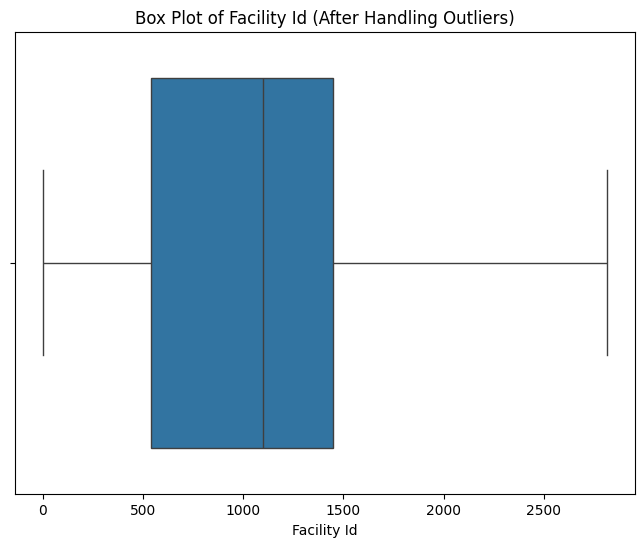

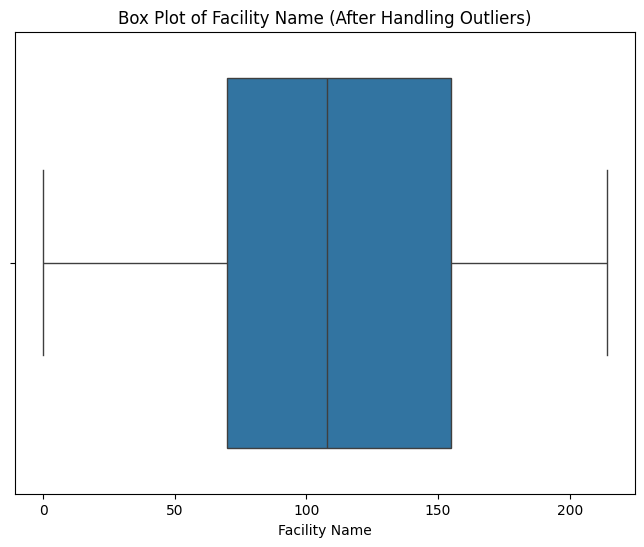

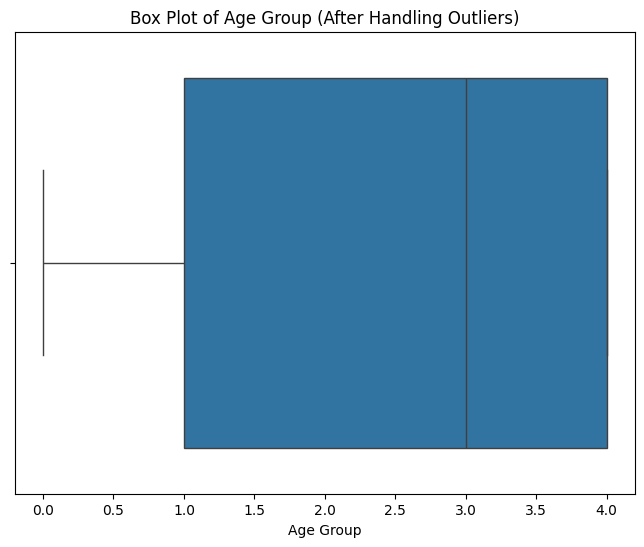

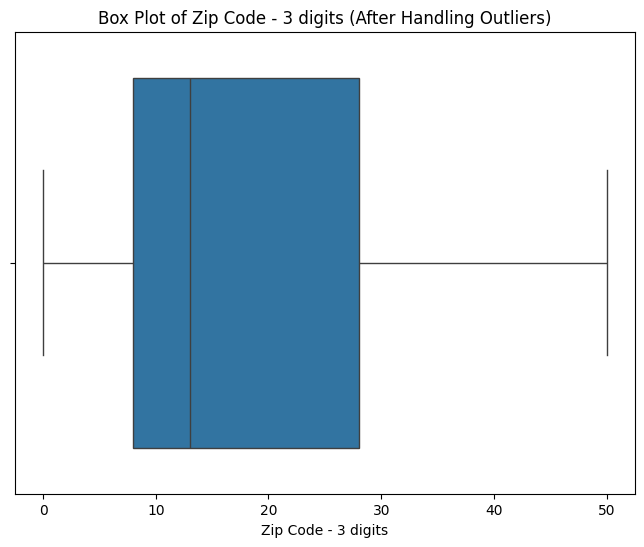

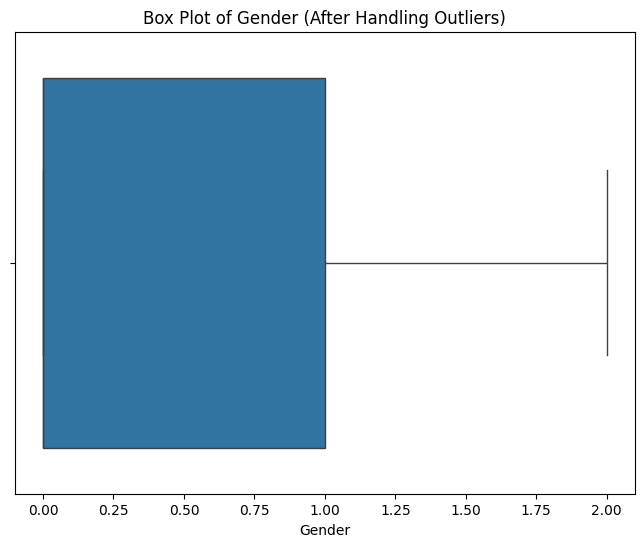

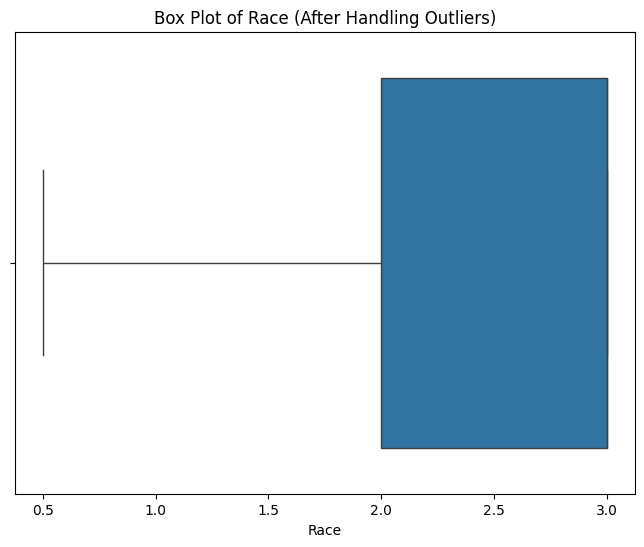

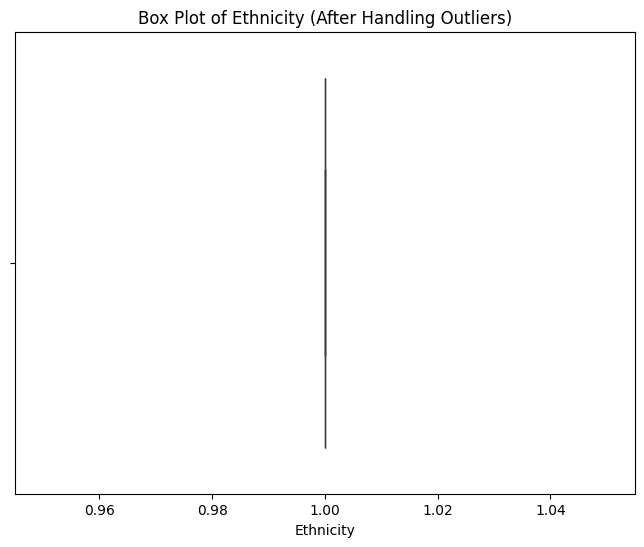

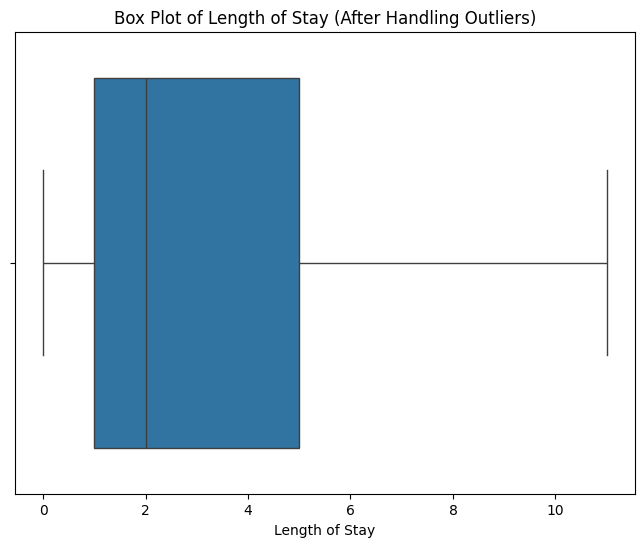

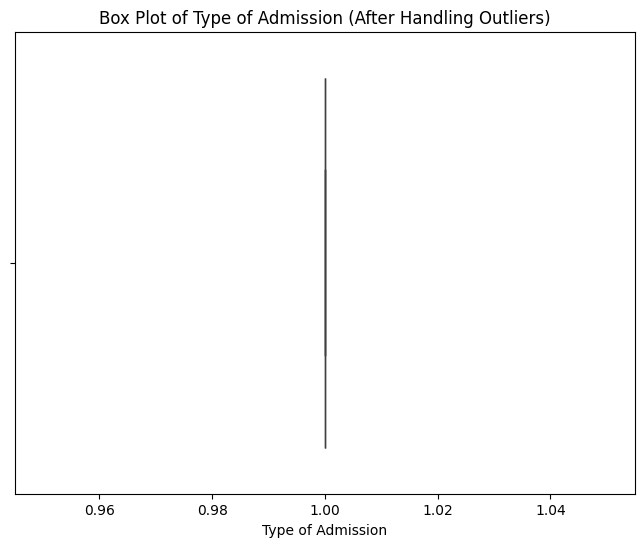

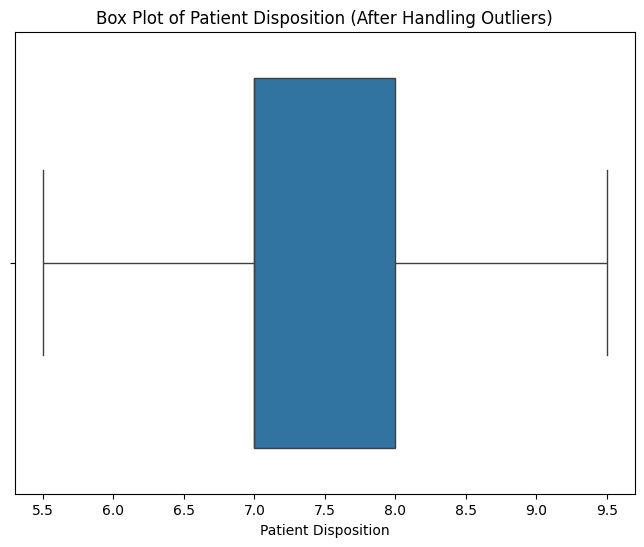

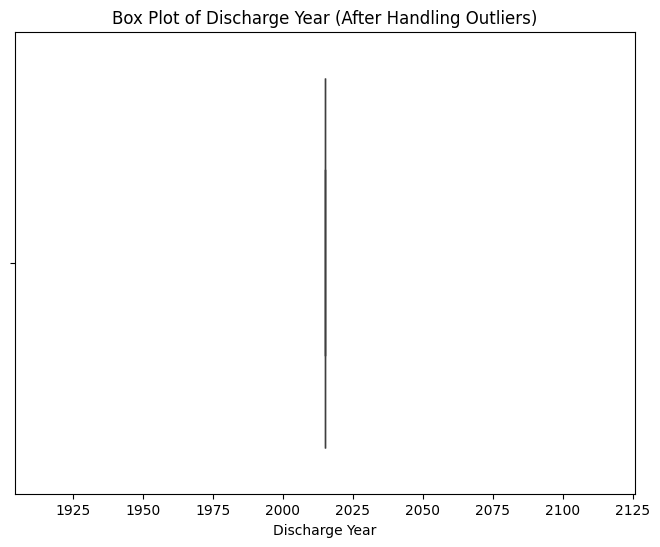

In [42]:

columns_to_check = ['Facility Id', 'Facility Name', 'Age Group', 'Zip Code - 3 digits',
                   'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Type of Admission',
                   'Patient Disposition', 'Discharge Year']

for column in columns_to_check:

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[column] = np.clip(df[column], lower_bound, upper_bound)


  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column} (After Handling Outliers)')
  plt.show()


In [43]:
df.drop('Discharge Year', axis=1, inplace=True)

In [44]:
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,7,4,401001.0,66.0,133,3,46,0,3.0,1,...,0,753,19,1,2,0,4,1,90660,265431
1,7,4,401001.0,66.0,133,1,46,0,3.0,1,...,0,753,19,2,2,0,4,1,158359,450402
2,7,4,401001.0,66.0,133,2,46,1,3.0,1,...,0,753,19,1,2,0,4,1,181005,466938
3,7,4,401001.0,66.0,133,3,46,0,3.0,1,...,0,141,4,1,2,0,5,1,320417,267282
4,7,6,602001.0,103.0,209,3,46,1,3.0,1,...,0,53,1,2,3,0,4,1,197988,249754


In [45]:

label_encoder = LabelEncoder()
df['Emergency Department Indicator'] = label_encoder.fit_transform(df['Emergency Department Indicator'])


In [46]:
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,7,4,401001.0,66.0,133,3,46,0,3.0,1,...,0,753,19,1,2,0,4,1,90660,265431
1,7,4,401001.0,66.0,133,1,46,0,3.0,1,...,0,753,19,2,2,0,4,1,158359,450402
2,7,4,401001.0,66.0,133,2,46,1,3.0,1,...,0,753,19,1,2,0,4,1,181005,466938
3,7,4,401001.0,66.0,133,3,46,0,3.0,1,...,0,141,4,1,2,0,5,1,320417,267282
4,7,6,602001.0,103.0,209,3,46,1,3.0,1,...,0,53,1,2,3,0,4,1,197988,249754


In [47]:
df['Emergency Department Indicator'].value_counts()

,count
Emergency Department Indicator,
1,1369065
0,977695


In [48]:
df.shape

(2346760, 24)

In [60]:
df1=df.copy()

In [61]:
df1 = df1.sample(frac=0.1, random_state=42)
# df1.drop(columns=['Facility Id','Facility Name'],inplace=True)
df1.shape

(234676, 24)

In [62]:
X=df1.drop(columns=['Length of Stay'],axis=1)
y=df1['Length of Stay']
X

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
653914,0,52,5601000.0,1005.0,55,4,27,1,3.0,1,...,0,139,4,2,3,0,5,1,880536,723905
104569,7,14,1401013.0,218.0,159,3,41,0,3.0,1,...,78,221,6,2,2,2,7,0,867021,881358
1129243,5,21,7001003.0,1288.0,17,4,11,1,0.5,1,...,193,47,1,2,3,0,5,1,1413060,1094015
693749,3,13,1302001.0,181.0,203,3,24,1,3.0,1,...,58,425,10,3,3,0,5,1,1010470,583763
83332,7,14,1401008.0,213.0,89,2,41,1,3.0,1,...,0,282,7,2,3,0,4,1,181981,171736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406822,5,25,7002002.0,1439.0,101,0,11,1,2.0,1,...,220,640,15,1,2,0,4,0,382569,32145
2162226,4,28,2951001.0,541.0,128,4,9,0,3.0,1,...,231,720,18,2,1,0,5,1,1251691,629871
1855534,5,38,7003004.0,1630.0,79,2,13,0,2.0,1,...,218,812,21,2,2,0,0,0,693280,272308
1704664,5,25,7002032.0,1466.0,105,3,0,1,0.5,1,...,231,203,5,1,2,0,4,0,95054,47158


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
rf=RandomForestRegressor(n_estimators=200,max_samples=0.75,random_state=42)
rf.fit(X_train_imputed, y_train)
y_pred = rf.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.383620365497699
R-squared: 0.8785333602763634
Mean Absolute Error: 0.7128333262314642


In [75]:
gb=GradientBoostingRegressor()
gb.fit(X_train_imputed, y_train)
y_pred = rf.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.383620365497699
R-squared: 0.8785333602763634
Mean Absolute Error: 0.7128333262314642


In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
model = XGBRegressor(verbosity=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred=np.round(y_pred)
y_pred=y_pred.astype(int)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
# print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 1.474198909152889
R-squared: 0.8705815610666872
Mean Absolute Error: 0.7382606101926027


In [54]:
from sklearn.model_selection import  GridSearchCV,cross_val_score
cv1 = cross_val_score(model, X_train, y_train, cv=10)
cv1

array([0.87568876, 0.87616926, 0.87405268, 0.87109222, 0.87207184,
       0.87511297, 0.874558  , 0.87526184, 0.87183458, 0.87195908])

In [55]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb = XGBRegressor()

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1

)
print(random_search)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred=np.round(y_pred)
y_pred=y_pred.astype(int)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mean Squared Error: 1.2767598431907279
R-squared: 0.8879145380093694
Mean Absolute Error: 0.6591102778251235


In [66]:
# best_model.reg_alpha=0.2
# best_model.reg_lambda=2.5
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
# y_pred=np.round(y_pred)
# y_pred=y_pred.astype(int)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.1893909801562133
R-squared: 0.895584562586855
Mean Absolute Error: 0.7122490269717864


In [71]:
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
bag_model = BaggingRegressor(base_estimator=best_model, n_estimators=10, random_state=42)
bag_model.fit(X_train, y_train)
y_pred = bag_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [70]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.1761295667279001
R-squared: 0.8967487687284319
Mean Absolute Error: 0.7068630453134361


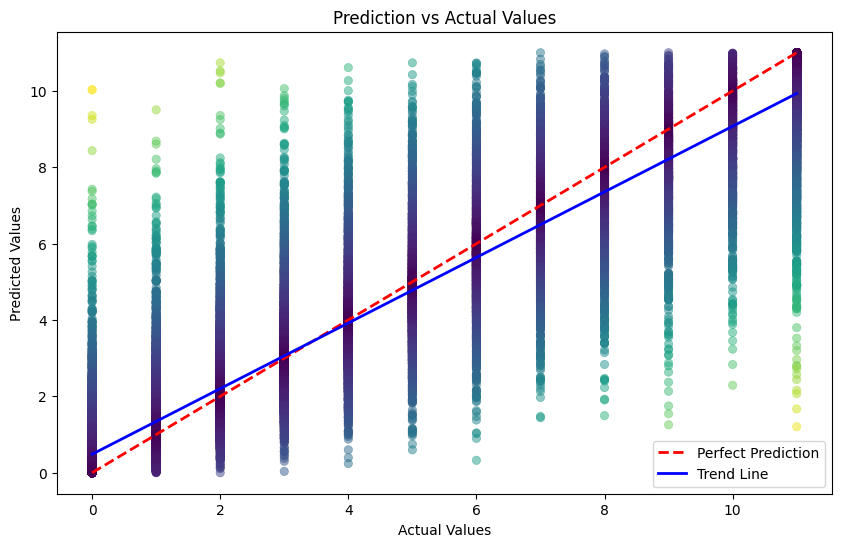

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, edgecolor=None, hue=np.abs(y_test - y_pred), palette='viridis', legend=False)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='blue', line_kws={"linewidth": 2}, label='Trend Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values')

plt.legend()
plt.show()
